<a href="https://colab.research.google.com/github/GabrielBora/GabrielBora/blob/main/UnicornAnalisys.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')

In [2]:
#Reading Data
Base_Dados = pd.read_csv('unicorns till sep 2022.csv')

#Dimension
Base_Dados.shape
# 1186 lines - 7 columns

(1186, 7)

In [6]:
Base_Dados.head()

,Company,Valuation ($B),Date Joined,Country,City,Industry,Investors
0,ByteDance,$140,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$127,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,$100,7/3/2018,China,Shenzhen,E-commerce & direct-to-consumer,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,$95,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG"
4,Canva,$40,1/8/2018,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat..."


In [63]:
#Checking infos
Base_Dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1186 entries, 0 to 1185
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Company         1186 non-null   object        
 1   Valuation ($B)  1186 non-null   object        
 2   Date Joined     1186 non-null   datetime64[ns]
 3   Country         1186 non-null   object        
 4   City            1186 non-null   object        
 5   Industry        1186 non-null   object        
 6   Investors       1168 non-null   object        
 7   Month           1186 non-null   int64         
 8   Year            1186 non-null   int64         
dtypes: datetime64[ns](1), int64(2), object(6)
memory usage: 83.5+ KB


In [62]:
#Null Camps
Base_Dados.isnull().sum()

Company            0
Valuation ($B)     0
Date Joined        0
Country            0
City               0
Industry           0
Investors         18
Month              0
Year               0
dtype: int64

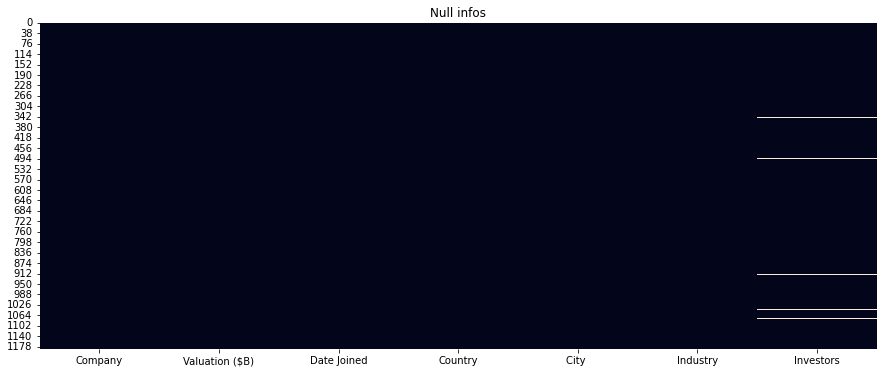

In [10]:
plt.figure( figsize=(15,6) )
plt.title('Null infos')
sns.heatmap( Base_Dados.isnull(), cbar=False );
#Low number of Null camps, no problems to the analysis.

In [11]:
#Unique Infos
Base_Dados.nunique()

Company           1183
Valuation ($B)     222
Date Joined        695
Country             48
City               286
Industry            34
Investors         1152
dtype: int64

In [44]:
Base_Dados['Industry'].value_counts()

Fintech                                                               239
Internet software & services                                          224
E-commerce & direct-to-consumer                                       103
Health                                                                 94
Artificial intelligence                                                74
Supply chain, logistics, & delivery                                    65
Other                                                                  65
Cybersecurity                                                          58
Data management & analytics                                            45
Auto & transportation                                                  40
Hardware                                                               38
Mobile & telecommunications                                            37
Edtech                                                                 32
Consumer & retail                     

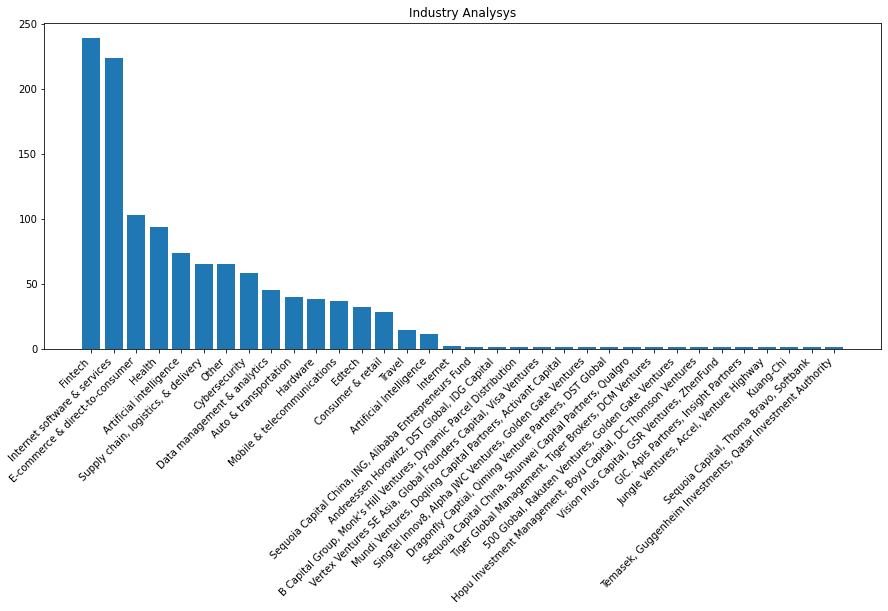

In [48]:
plt.figure( figsize=(15,6) )
plt.title('Industry Analysys')
plt.bar( Base_Dados['Industry'].value_counts().index, Base_Dados['Industry'].value_counts())
plt.xticks( rotation=45, ha='right');


In [26]:
Analysys = round( Base_Dados['Country'].value_counts( normalize=True) * 100, 2)

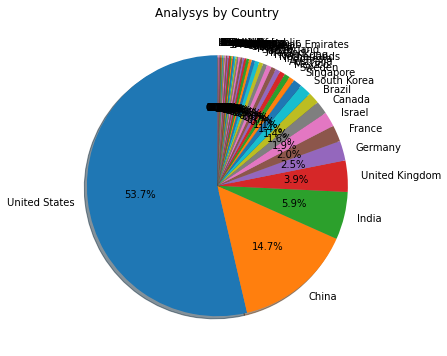

In [51]:
plt.figure( figsize=(15,6) )
plt.title('Analysys by Country')
plt.pie(
    Analysys,
    labels = Analysys.index,
    shadow = True,
    startangle = 90,
    autopct = '%1.1f%%'
);


In [43]:
Analysys

United States     53.63
China             14.67
India              5.90
United Kingdom     3.88
Germany            2.45
France             2.02
Israel             1.85
Canada             1.60
Brazil             1.43
South Korea        1.43
Name: Country, dtype: float64

In [52]:
Base_Dados['Date Joined'] = pd.to_datetime( Base_Dados['Date Joined'])
Base_Dados['Date Joined'].head()
#Transforming object to date

0   2017-04-07
1   2012-12-01
2   2018-07-03
3   2014-01-23
4   2018-01-08
Name: Date Joined, dtype: datetime64[ns]

In [54]:
Base_Dados['Month'] = pd.DatetimeIndex( Base_Dados['Date Joined']).month
Base_Dados['Year'] = pd.DatetimeIndex( Base_Dados['Date Joined']).year

Base_Dados.head()

#Date to month || year

,Company,Valuation ($B),Date Joined,Country,City,Industry,Investors,Month,Year
0,ByteDance,$140,2017-04-07,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",4,2017
1,SpaceX,$127,2012-12-01,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",12,2012
2,SHEIN,$100,2018-07-03,China,Shenzhen,E-commerce & direct-to-consumer,"Tiger Global Management, Sequoia Capital China...",7,2018
3,Stripe,$95,2014-01-23,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",1,2014
4,Canva,$40,2018-01-08,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat...",1,2018


In [104]:
#Grouping by specifications
Group_Analysys = Base_Dados.groupby( by=['Country', 'Year', 'Month',]).count()['Company'].reset_index()

In [105]:
Group_Analysys.loc[
    Group_Analysys['Country'] == 'Brazil'
].reset_index()


# I gotta change the company infos to words and not numbers

,index,Country,Year,Month,Company
0,14,Brazil,2018,7,1
1,15,Brazil,2018,11,1
2,16,Brazil,2019,6,1
3,17,Brazil,2019,9,1
4,18,Brazil,2019,10,1
5,19,Brazil,2019,12,1
6,20,Brazil,2020,1,1
7,21,Brazil,2020,12,2
8,22,Brazil,2021,1,1
9,23,Brazil,2021,8,2
